<div class="alert alert-danger">
    <h4 style="font-weight: bold; font-size: 28px;">Exploratory Data Analysis of Processed Data</h4>
    <p style="font-size: 20px;">NBA API Data (1984-2024)</p>
</div>

<a name="EDAp"></a>

# Table of Contents

[Setup](#Setup)

[Data](#Data)

**[1. Team Level Data](#1.-Team-Level-Data)**

- [1.1. Score Total](#1.1.-Score-Total)

- [1.2. Score Difference](#1.2.-Score-Difference)
  
**[2. Player Level Data](#2.-Player-Level-Data)**

# Setup

[Return to top](#EDAp)

In [13]:
# basic modules
import os
import time
import random as rn
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# plotting style
plt.style.use('seaborn-v0_8-notebook')
sns.set_style('white')
#sns.set_style('darkgrid')

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

# warnings
import warnings
warnings.filterwarnings("ignore")

# user defined functions
import utility_functions as utl

# Data

[Return to top](#EDAp)

In [14]:
team_matchups_df = pd.read_csv('../data/processed/nba_team_matchups_1984_2024.csv')

# convert 'GAME_DATE' column to datetime
team_matchups_df['GAME_DATE'] = pd.to_datetime(team_matchups_df['GAME_DATE'])

In [15]:
team_matchups_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52083 entries, 0 to 52082
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   SEASON_ID               52083 non-null  int64         
 1   HOME_TEAM_ID            52083 non-null  int64         
 2   HOME_TEAM_ABBREVIATION  52083 non-null  object        
 3   HOME_TEAM_NAME          52083 non-null  object        
 4   GAME_ID                 52083 non-null  int64         
 5   GAME_DATE               52083 non-null  datetime64[ns]
 6   HOME_WL                 52081 non-null  object        
 7   HOME_MIN                52083 non-null  int64         
 8   HOME_PTS                52083 non-null  int64         
 9   HOME_FGM                52083 non-null  int64         
 10  HOME_FGA                52083 non-null  int64         
 11  HOME_FG_PCT             52083 non-null  float64       
 12  HOME_FG3M               52083 non-null  int64 

In [16]:
team_matchups_df.head()

,SEASON_ID,HOME_TEAM_ID,HOME_TEAM_ABBREVIATION,HOME_TEAM_NAME,GAME_ID,GAME_DATE,HOME_WL,HOME_MIN,HOME_PTS,HOME_FGM,HOME_FGA,HOME_FG_PCT,HOME_FG3M,HOME_FG3A,HOME_FG3_PCT,HOME_FTM,HOME_FTA,HOME_FT_PCT,HOME_OREB,HOME_DREB,HOME_REB,HOME_AST,HOME_STL,HOME_BLK,HOME_TOV,...,AWAY_TEAM_NAME,AWAY_WL,AWAY_MIN,AWAY_PTS,AWAY_FGM,AWAY_FGA,AWAY_FG_PCT,AWAY_FG3M,AWAY_FG3A,AWAY_FG3_PCT,AWAY_FTM,AWAY_FTA,AWAY_FT_PCT,AWAY_OREB,AWAY_DREB,AWAY_REB,AWAY_AST,AWAY_STL,AWAY_BLK,AWAY_TOV,AWAY_PF,AWAY_PLUS_MINUS,TOTAL_PTS,HOME_PM,AWAY_PM
0,21983,1610612737,ATL,Atlanta Hawks,28300014,1983-10-29,W,240,117,49,94,0.521,0,1.0,0.0,19,30,0.633,27.0,21.0,48.0,28,14.0,7,23,...,Detroit Pistons,L,240,115,40,88,0.455,3,4.0,0.75,32,38,0.842,23.0,22.0,45.0,22,10.0,2,21,29,NaN,232,2,-2
1,21983,1610612737,ATL,Atlanta Hawks,28300027,1983-11-01,W,240,95,38,81,0.469,0,0.0,NaN,19,30,0.633,12.0,29.0,41.0,20,7.0,10,16,...,Washington Bullets,L,240,92,35,74,0.473,0,0.0,NaN,22,34,0.647,10.0,37.0,47.0,20,5.0,3,22,26,NaN,187,3,-3
2,21983,1610612737,ATL,Atlanta Hawks,28300041,1983-11-04,W,240,103,42,86,0.488,1,1.0,1.0,18,26,0.692,19.0,27.0,46.0,31,14.0,13,18,...,Chicago Bulls,L,240,90,30,80,0.375,0,3.0,0.00,30,41,0.732,25.0,28.0,53.0,13,6.0,3,26,25,NaN,193,13,-13
3,21983,1610612737,ATL,Atlanta Hawks,28300101,1983-11-15,W,240,107,45,84,0.536,0,0.0,NaN,17,21,0.810,17.0,24.0,41.0,24,7.0,10,18,...,San Diego Clippers,L,240,102,40,78,0.513,0,2.0,0.00,22,33,0.667,17.0,22.0,39.0,28,5.0,6,19,20,NaN,209,5,-5
4,21983,1610612737,ATL,Atlanta Hawks,28300112,1983-11-17,W,240,99,35,66,0.530,1,2.0,0.5,28,40,0.700,10.0,35.0,45.0,20,5.0,12,23,...,Philadelphia 76ers,L,240,94,35,87,0.402,2,5.0,0.40,22,27,0.815,16.0,24.0,40.0,17,7.0,5,16,32,NaN,193,5,-5


In [17]:
team_matchups_df.describe()

,SEASON_ID,HOME_TEAM_ID,GAME_ID,GAME_DATE,HOME_MIN,HOME_PTS,HOME_FGM,HOME_FGA,HOME_FG_PCT,HOME_FG3M,HOME_FG3A,HOME_FG3_PCT,HOME_FTM,HOME_FTA,HOME_FT_PCT,HOME_OREB,HOME_DREB,HOME_REB,HOME_AST,HOME_STL,HOME_BLK,HOME_TOV,HOME_PF,HOME_PLUS_MINUS,AWAY_TEAM_ID,AWAY_MIN,AWAY_PTS,AWAY_FGM,AWAY_FGA,AWAY_FG_PCT,AWAY_FG3M,AWAY_FG3A,AWAY_FG3_PCT,AWAY_FTM,AWAY_FTA,AWAY_FT_PCT,AWAY_OREB,AWAY_DREB,AWAY_REB,AWAY_AST,AWAY_STL,AWAY_BLK,AWAY_TOV,AWAY_PF,AWAY_PLUS_MINUS,TOTAL_PTS,HOME_PM,AWAY_PM
count,52083.000,5.208e+04,5.208e+04,52083,52083.000,52083.000,52083.000,52083.000,52083.000,52083.000,52082.000,51468.000,52083.000,52083.000,52083.000,52080.000,52080.000,52083.000,52083.000,52082.000,52083.000,52083.000,52083.000,37244.000,5.208e+04,52083.000,52083.000,52083.000,52083.000,52083.000,52083.000,52082.000,51664.000,52083.000,52083.000,52083.000,52082.000,52082.000,52083.000,52083.000,52082.000,52083.000,52083.000,52083.000,37244.000,52083.000,52083.000,52083.000
mean,22882.646,1.611e+09,5.769e+07,2005-02-10 02:14:42.115085696,240.494,103.711,38.871,83.508,0.466,6.291,17.681,0.343,19.677,25.999,0.757,12.096,31.266,43.364,23.646,7.979,5.301,14.396,21.616,2.820,1.611e+09,240.487,100.435,37.776,83.335,0.454,6.177,17.736,0.335,18.707,24.795,0.755,11.685,30.127,41.813,21.920,7.837,4.686,14.800,22.393,-2.821,204.146,3.276,-3.276
min,12003.000,1.611e+09,1.030e+07,1983-10-28 00:00:00,-1.000,36.000,12.000,29.000,0.217,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,15.000,4.000,0.000,0.000,1.000,5.000,-68.000,1.611e+09,0.000,33.000,9.000,31.000,0.239,0.000,0.000,0.000,1.000,1.000,0.143,0.000,0.000,3.000,2.000,0.000,0.000,2.000,5.000,-73.000,69.000,-68.000,-73.000
25%,21994.000,1.611e+09,2.090e+07,1995-03-31 12:00:00,240.000,94.000,35.000,78.000,0.425,3.000,10.000,0.256,15.000,20.000,0.696,9.000,27.000,39.000,20.000,6.000,3.000,11.000,18.000,-7.000,1.611e+09,240.000,91.000,34.000,77.000,0.415,3.000,10.000,0.250,14.000,19.000,0.692,9.000,26.000,37.000,18.000,6.000,3.000,12.000,19.000,-11.000,188.000,-6.000,-12.000
50%,22005.000,1.611e+09,2.200e+07,2005-12-27 00:00:00,240.000,103.000,39.000,83.000,0.465,6.000,16.000,0.345,19.000,25.000,0.763,12.000,31.000,43.000,23.000,8.000,5.000,14.000,21.000,4.000,1.611e+09,240.000,100.000,38.000,83.000,0.453,6.000,16.000,0.333,18.000,24.000,0.760,11.000,30.000,42.000,22.000,8.000,4.000,15.000,22.000,-4.000,203.000,4.000,-4.000
75%,22015.000,1.611e+09,2.920e+07,2015-01-02 00:00:00,240.000,113.000,43.000,89.000,0.506,9.000,24.000,0.429,24.000,31.000,0.825,15.000,35.000,48.000,27.000,10.000,7.000,17.000,25.000,11.000,1.611e+09,240.000,109.000,42.000,89.000,0.493,9.000,24.000,0.423,23.000,30.000,0.824,14.000,34.000,46.000,25.000,10.000,6.000,18.000,26.000,7.000,220.000,12.000,6.000
max,62023.000,1.611e+09,1.622e+09,2024-01-21 00:00:00,688.000,184.000,68.000,135.000,0.697,28.000,70.000,2.000,61.000,80.000,1.000,37.000,55.000,77.000,50.000,27.000,23.000,39.000,45.000,73.000,1.611e+09,450.000,186.000,74.000,136.000,0.687,29.000,69.000,2.000,52.000,64.000,1.000,38.000,60.000,81.000,52.000,24.000,20.000,40.000,52.000,68.000,370.000,73.000,68.000
std,5186.553,8.566e+00,2.179e+08,NaN,11.933,14.021,6.106,8.752,0.059,4.471,10.746,0.156,6.793,8.416,0.099,4.432,5.651,6.870,5.731,3.098,2.758,4.150,4.725,13.417,8.571e+00,11.774,13.618,5.839,8.767,0.057,4.378,10.632,0.151,6.414,7.941,0.101,4.266,5.609,6.659,5.411,3.015,2.509,4.323,4.967,13.414,24.218,13.326,13.326


<a name="1.-Team-Level-Data"></a>
# 1. Team Level Data

[Return to top](#EDAp)

<a name="1.1.-Score-Total"></a>
## 1.1. Score Total

[Return to top](#EDAp)

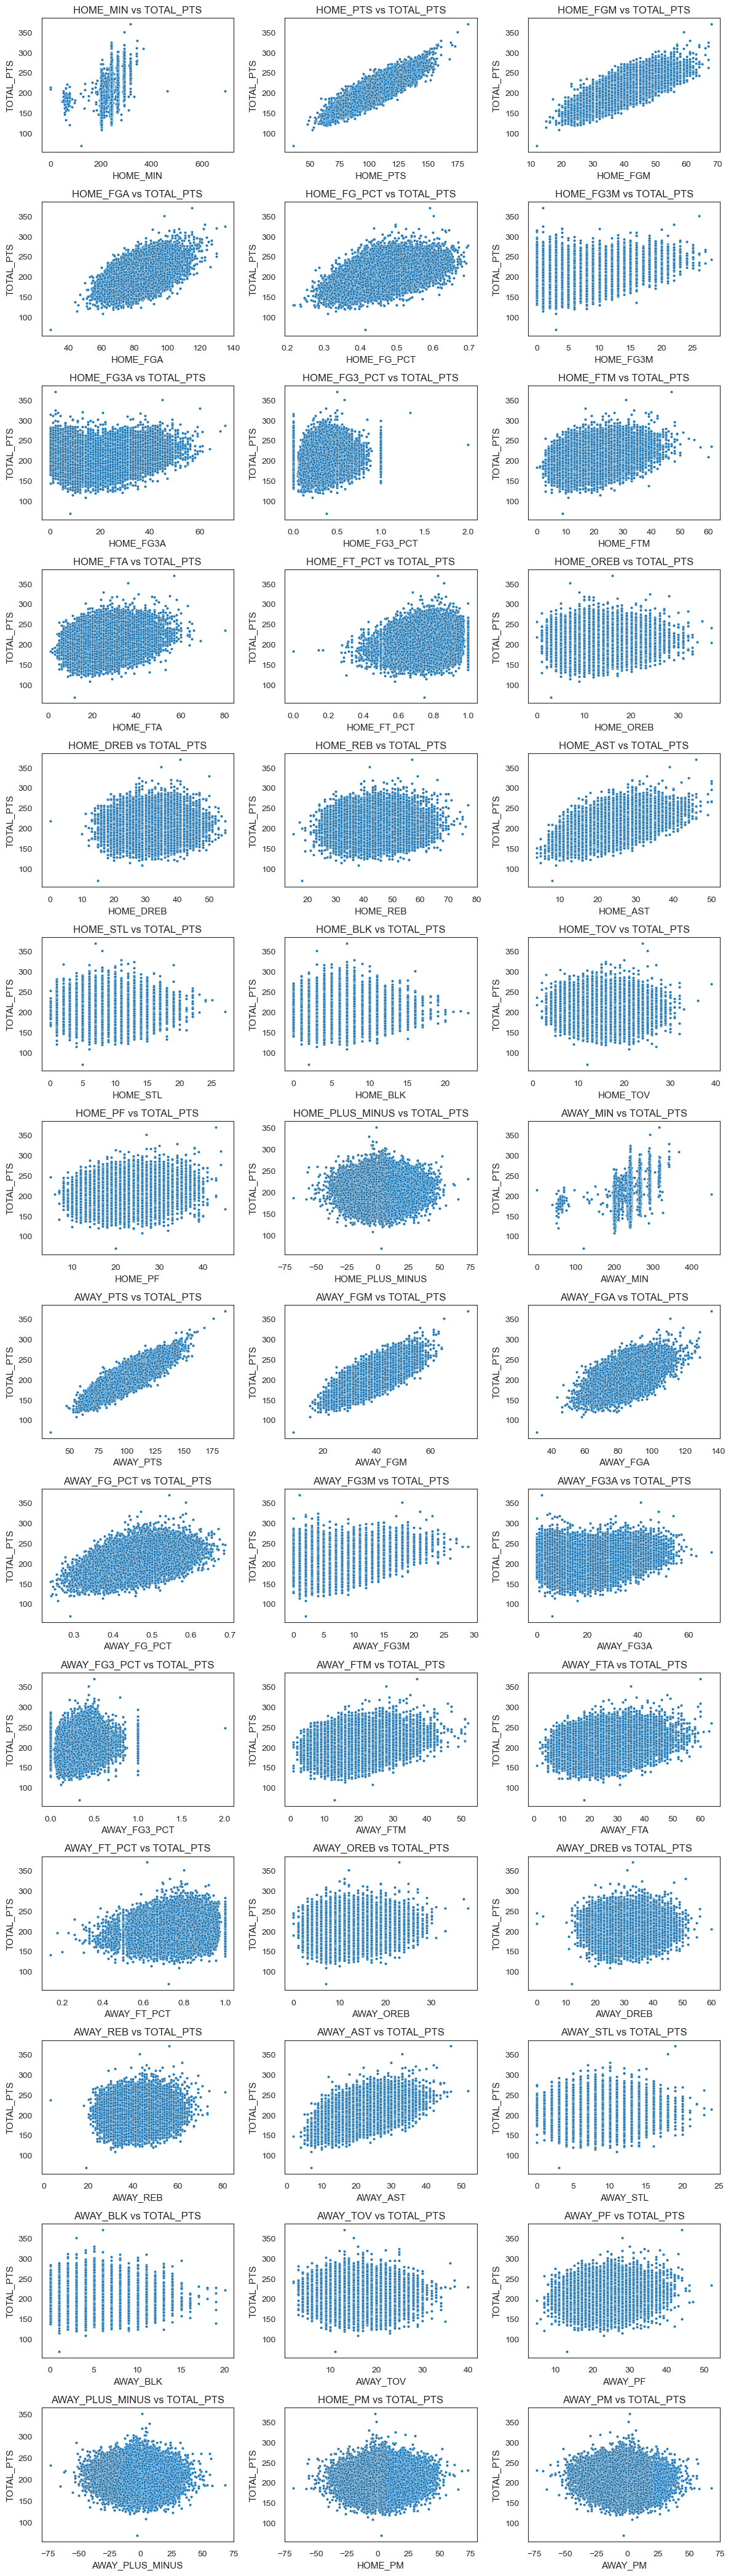

In [24]:
# scatterplots of target against all other variables
target = 'TOTAL_PTS'

# columns not to be plotted
omit_cols = [
  'SEASON_ID', 'HOME_TEAM_ID', 'HOME_TEAM_ABBREVIATION', 'HOME_TEAM_NAME',
  'GAME_ID', 'GAME_DATE', 'HOME_WL', 'AWAY_TEAM_ID', 'AWAY_TEAM_ABBREVIATION',
  'AWAY_TEAM_NAME', 'AWAY_WL'
]

# filter out columns to omit and the target column
plot_cols = [col for col in team_matchups_df.columns if col not in omit_cols and col != target]

# setup subplots
n_cols = len(plot_cols)
n_rows = (n_cols + 1) // 3  
fig, axs = plt.subplots(n_rows, 3, figsize=(12, 3 * n_rows))  
axs = axs.ravel()

# loop through each column and create scatter plots
for i, col in enumerate(plot_cols):
    sns.scatterplot(x=team_matchups_df[col], y=team_matchups_df[target], s=10, ax=axs[i])
    axs[i].set_title(f'{col} vs {target}')

# hide any unused axes
for i in range(n_cols, len(axs)):
    axs[i].set_visible(False)

plt.tight_layout()

<a name="1.2.-Score-Difference"></a>
## 1.2. Score Difference

[Return to top](#EDAp)

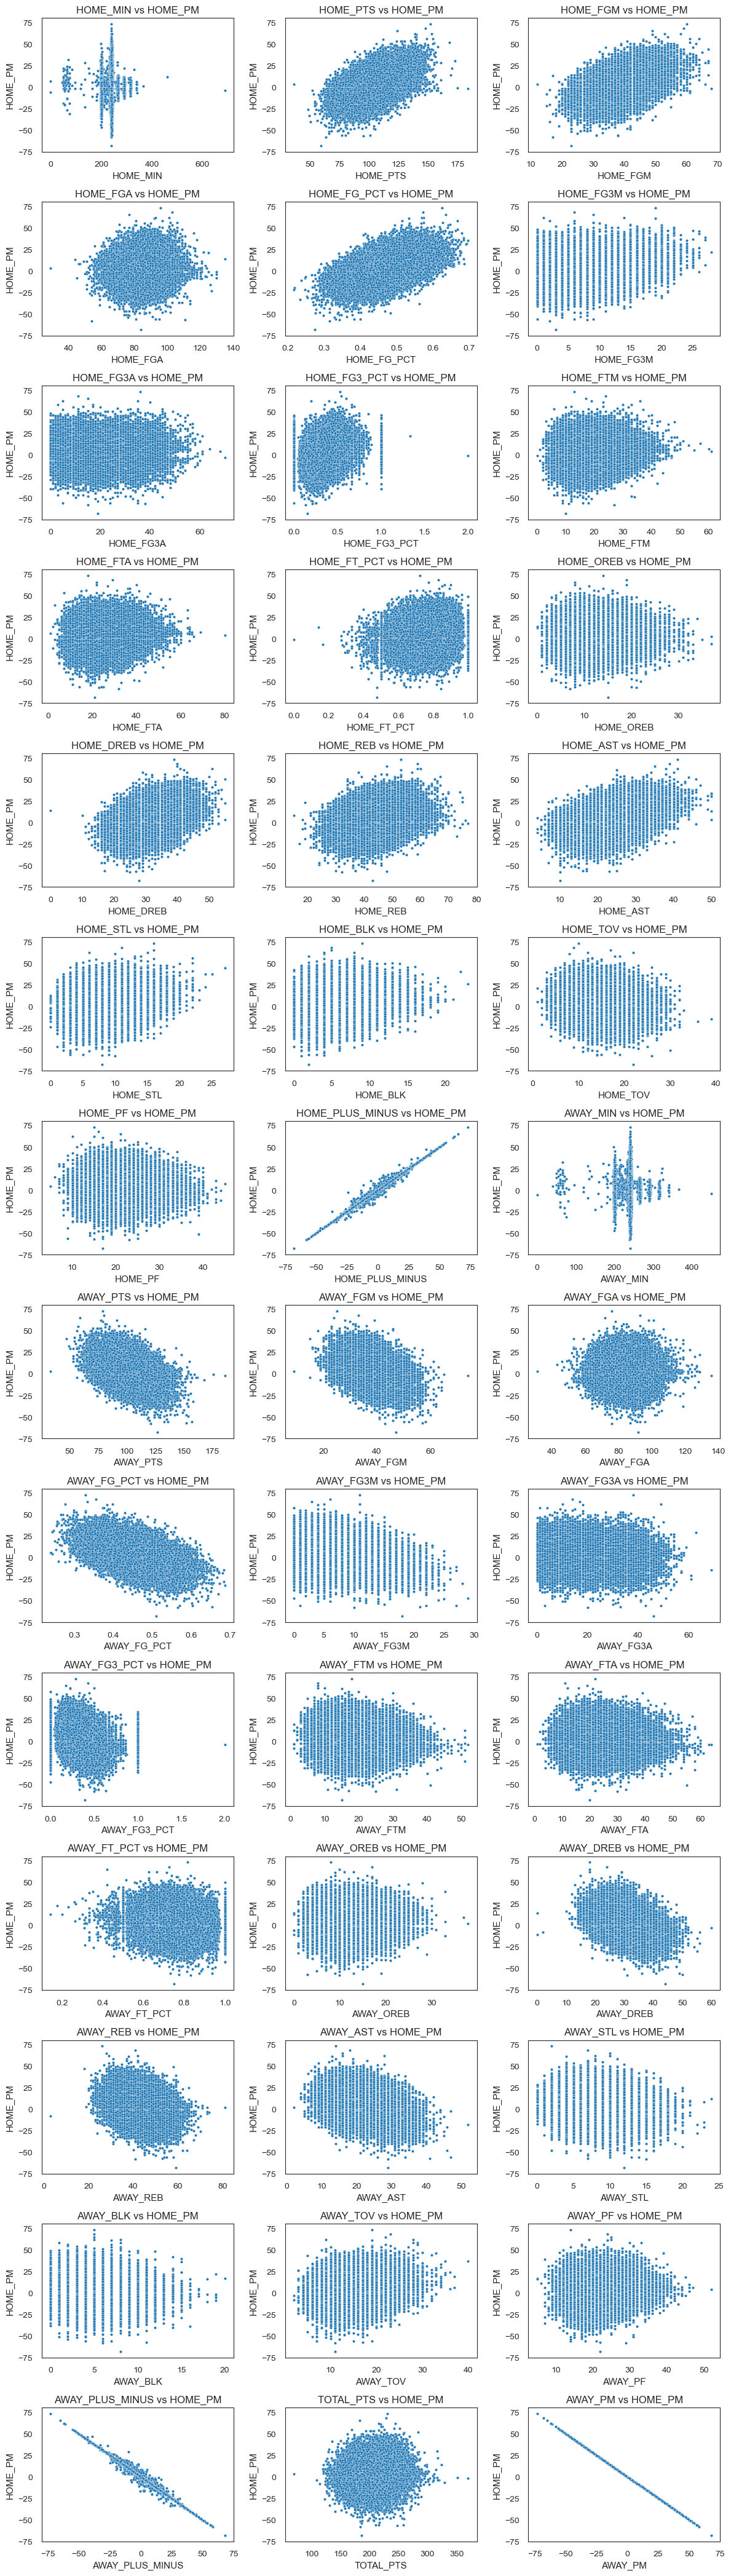

In [25]:
# scatterplots of target against all other variables
target = 'HOME_PM'

# columns not to be plotted
omit_cols = [
  'SEASON_ID', 'HOME_TEAM_ID', 'HOME_TEAM_ABBREVIATION', 'HOME_TEAM_NAME',
  'GAME_ID', 'GAME_DATE', 'HOME_WL', 'AWAY_TEAM_ID', 'AWAY_TEAM_ABBREVIATION',
  'AWAY_TEAM_NAME', 'AWAY_WL'
]

# filter out columns to omit and the target column
plot_cols = [col for col in team_matchups_df.columns if col not in omit_cols and col != target]

# setup subplots
n_cols = len(plot_cols)
n_rows = (n_cols + 1) // 3  
fig, axs = plt.subplots(n_rows, 3, figsize=(12, 3 * n_rows))  
axs = axs.ravel()

# loop through each column and create scatter plots
for i, col in enumerate(plot_cols):
    sns.scatterplot(x=team_matchups_df[col], y=team_matchups_df[target], s=10, ax=axs[i])
    axs[i].set_title(f'{col} vs {target}')

# hide any unused axes
for i in range(n_cols, len(axs)):
    axs[i].set_visible(False)

plt.tight_layout()

<a name="2.-Player-Level-Data"></a>
# 2. Player Level Data

[Return to top](#EDAp)